In [1]:
import os
import numpy as np
from utils import NearestNeighbour
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
fns = [os.path.join('cifar-10-batches-py', fn) for fn in os.listdir('cifar-10-batches-py')]
fns_training = list(filter(lambda x: 'data_batch' in x, fns))
data = [unpickle(fn) for fn in fns_training]
fns_test = list(filter(lambda x: 'test_batch' in x, fns))
data_test = [unpickle(fn) for fn in fns_test]

In [4]:
# lets split the data into training, validation and test
X = np.concatenate([data[i][b'data'] for i in range(len(data))], axis=0)
Y = np.concatenate([data[i][b'labels'] for i in range(len(data))], axis=0)
Xtr = X[0:45000, :]
Ytr = Y[0:45000]
Xdev = X[45000:50000, :]
Ydev = Y[45000:50000]
Xtest = np.concatenate([data_test[i][b'data'] for i in range(len(data_test))], axis=0)
Ytest = np.concatenate([data_test[i][b'labels'] for i in range(len(data_test))], axis=0)

(-0.5, 31.5, 31.5, -0.5)

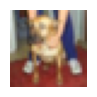

In [5]:
# lets look at some images
ix = 51
img = Xtr[ix].reshape(3, 32, 32)
img = np.rollaxis(img, 0, 3)
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.axis('off')

In [14]:
nn = NearestNeighbour()
nn.train(Xtr, Ytr)
Ydev_pred = nn.predict(Xdev[:1000])

In [15]:
np.sum(Ydev_pred == Ydev[:1000])/1000

0.258